In [5]:
import numpy as np
from matplotlib import pyplot as plt
from deepsudoku.utils import data_utils


In [2]:
data_utils.split_data()
train_sudokus_raw, val_sudokus_raw, _ = data_utils.load_data()


In [3]:
def natural_distribution():
    possible_numbers_of_moves_to_make = list(range(0,64))
    with open("data/natural_distribution.np", 'rb') as f:
        probabilities = np.load(f)
    probabilities = probabilities/sum(probabilities)
    return possible_numbers_of_moves_to_make, probabilities

train_sudokus = data_utils.make_moves(train_sudokus_raw, n_moves_distribution=natural_distribution, invalid_sudoku_probability = 0.2)
val_sudokus = data_utils.make_moves(val_sudokus_raw, n_moves_distribution=natural_distribution, invalid_sudoku_probability = 0.2)

In [4]:
dictionary_valid = {}
for i, train_sudoku in enumerate(train_sudokus):
    if train_sudoku[2]:
        current_zeros = len(np.argwhere(train_sudoku[0] == 0))
        if current_zeros in dictionary_valid.keys():
            dictionary_valid[current_zeros] += 1
        else:
            dictionary_valid[current_zeros] = 1

In [5]:
dictionary_invalid = {}
for i, train_sudoku in enumerate(train_sudokus):
    if  not train_sudoku[2]:
        current_zeros = len(np.argwhere(train_sudoku[0] == 0))
        if current_zeros in dictionary_invalid.keys():
            dictionary_invalid[current_zeros] += 1
        else:
            dictionary_invalid[current_zeros] = 1

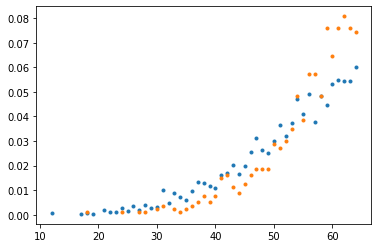

In [6]:
plt.plot(dictionary_valid.keys(), [x / sum(dictionary_valid.values()) for x in dictionary_valid.values()], '.')
plt.plot(dictionary_invalid.keys(), [x / sum(dictionary_invalid.values()) for x in dictionary_invalid.values()], '.')
plt.show()

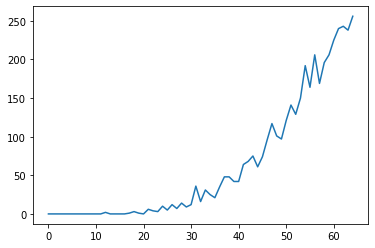

In [7]:
totals = np.zeros(65)
for sudoku in train_sudokus:
    totals[len(np.argwhere(sudoku[0]==0))] +=1
plt.plot(totals)

In [6]:
%%timeit
batch = data_utils.fast_generate_batch(train_sudokus)

32.6 ms ± 6.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
batch = data_utils.fast_generate_batch(train_sudokus)

In [9]:
batch[0].shape

(4062, 9, 9)

In [12]:
batch[1][1].shape

(4062,)